# TP 3 : Signature Plot, Effet Epps and Links between Market Indicators

## I. Volatility Estimator and Signature Plot

### 1. Signature Plot

Let $P$ be the price process, $X=\log P$ be the log-price process and $\Delta$ the discretization step over a time period $[0,T]$. Set for every $j\in{1,\ldots,T/\Delta}$, $r_{\Delta}(j)=X_{\Delta j}-X_{\Delta(j-1)}$ the log-price increments. Thus, in the Itô semi-martingale framework, the integrated variance reads
$$\int_0^T\sigma^2_sds=\lim_{\Delta\to0}\sum_{j=1}^{T/\Delta}r_{\Delta}(j)^2.$$
Consequently, a "natural" estimator for the integrated variance is 
$$\hat{V}_R(\Delta)=\sum_{j=1}^{T/\Delta}r_{\Delta}(j)^2.$$
This estimator is consistent since 
$$\hat{V}_R(\Delta)\overset{\mathbb{P}}{\underset{\Delta\to0}{\longrightarrow}}\int_0^T\sigma^2_sds.$$

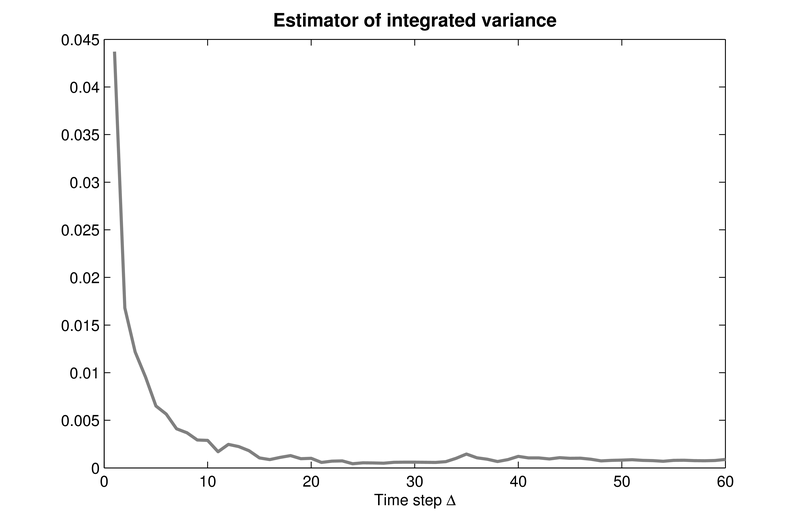

In [1]:
from IPython.display import Image
Image(filename='SignaturePlot.png')

_Estimator for the integrated variance computed for Rio Tinto between 03/01/2012 and 19/06/2012 according to the time discretization step._

They are many other ways to estimate the volatility: for example by using the minimum and the maximum of the price (see Garman & Klass), by considering multi-scale (see Ait-Sahalia or Ait-Sahalia & Jacod}) or by bid-ask modeling (see Robert & Rosenbaum).

**Observations and microstructure.** A model for log-price observation $X$ may be $X=M+\varepsilon$, where $M$ is a semi-martingale and $\varepsilon$ is the noise. Consequently
$$r_{\Delta}(j)=M_{\Delta j}-M_{\Delta(j-1)}+\varepsilon_{\Delta j}-\varepsilon_{\Delta(j-1)}=r^M_{\Delta}(j)+\eta_{\Delta}(j).$$
Thus the realized varince reads
$$\hat{V}_R(\Delta)=\sum_{j=1}^{T/\Delta}r_{\Delta}(j)^2=\sum_{j=1}^{T/\Delta}r^M_{\Delta}(j)^2+\sum_{j=1}^{T/\Delta}\eta_{\Delta}(j)^2+\sum_{j=1}^{T/\Delta}r^M_{\Delta}(j)\eta_{\Delta}(j).$$
This estimator diverges when $\Delta\to0$.

### 2. Intraday Volatility Estimator of Garman and Klass

They consider consider intraday volatility estimators that are based upon the historical opening, closing, high, and low prices and transaction volume. Since high and low prices require continuous monitoring to obtain, they correspondingly contain superior information content, exploited herein.

Their model assumes that a diffusion process governs security prices
$$P_t = \Phi(X_t)$$
where $P$ is the security price, $t$ is time, $\Phi$ is a monotonic, time-independent transformation, and $X_t$ is a diffusion process with the differential representation
$$dX_t = \sigma dW_t$$
where $W_t$ is the standard Brownian motion and $\sigma$ is an unknown constant to be estimated.

**"Best" Analytic Scale-invariant Estimators**

They consider estimators depending on
- the opening price,
- the closing price,
- the high price
- the low price.

For the authors, an estimator is "best" when it has minimum variance and is unbiased. They also impose the requirements that the estimators be analytic with price and time symmetries and scale-invariant. Under regularity condition (analytic in a neighborhood of the
origin), they obtain that the estimator must be quadratic in its arguments. Owing scale invariance and analyticity, they reduce the problem and find the "best" estimator of this form (unbiased with minimum variance). 

Finally, by eliminating the cross-product terms, the recommended and "more practical" estimator reads
$$\sigma_{GK}^2=\frac12\left(\mbox{High}-\mbox{Low}\right)^2-(2\ln2-1)\left(\mbox{Close}-\mbox{Open}\right)^2.$$

## II. Covariance Estimator and Epps Effect

### 1. "Classical" Covariance Estimator

Let $X^1= \log P^1$ and $X^2 = \log P^2$ be two log-price processes. 
$$d X^1 = \mu_t^1dt+\sigma_{t-}^1dW^1_t,$$
$$d X^2 = \mu_t^2dt+\sigma_{t-}^2dW^2_t,$$
with $d\left\langle W^1,W^2\right\rangle_t=\rho_tdt$.

Set for every $j\in{1,\ldots,T/\Delta}$, $r^1_{\Delta}(j)=X^1_{\Delta j}-X^1_{\Delta(j-1)}$ and $r^2_{\Delta}(j)=X^2_{\Delta j}-X^2_{\Delta(j-1)}$ the log-price increments.

Then the integrated covariance between the two assets reads
$$\int_0^T\rho_s\sigma^1_s\sigma^2_sds=\lim_{\Delta\to0}\sum_{j=1}^{T/\Delta}r^1_{\Delta}(j)r^2_{\Delta}(j).$$
Thus, an estimator for the realized covariance may be written as 
$$\hat{C}_R(\Delta)=\sum_{j=1}^{T/\Delta}r^1_{\Delta}(j)r^2_{\Delta}(j).$$ 
This estimator is consistent since 
$$\hat{C}_R(\Delta)\overset{\mathbb{P}}{\underset{\Delta\to0}{\longrightarrow}}\int_0^T\rho_s\sigma^1_s\sigma^2_sds.$$ 

The problem is that we must have synchronous data, but the quotations and transactions are asynchronous.

### 2. Previous Tick Estimator

Assume now that we observe $P^1$ at times $(T^1_j)_{j\geq1}$ and $P^2$ at times $(T^2_j)_{j\geq1}$. Therefore we design 
$$\bar{P}^1_t=P_{T^1_j} \quad\mbox{for }t\in[T^1_j,T^1_{j+1})$$
and
$$\bar{P}^2_t=P_{T^2_j} \quad\mbox{for }t\in[T^2_j,T^1_{j+1}).$$
Then 
$$\bar{X}^1_t=\log \bar{P}^1_t \quad\mbox{and}\quad\bar{X}^2_t=\log \bar{P}^2_t/$$

For a given $\Delta$, the previous tick covariation estimator is
$$\bar{C}_R(\Delta)=\sum_{j=1}^{T/\Delta}\left(\bar{X}^1_{\Delta j}-\bar{X}^1_{\Delta (j-1)}\right)\left(\bar{X}^2_{\Delta j}-\bar{X}^2_{\Delta (j-1)}\right).$$

### 3. Epps Effect

Epps (1979): "Correlations among price changes [...] are found to decrease with the length of the interval for which the price changes are measured."
Many explanations were proposed
- systematic bias for this estimator,
- "lead-lag" effect for the assets in the same sector,
- asynchronicity of transactions,
- "tick" effect and other microstructure effects.

**Example.** Assume that $X^1$ and $X^2$ are two Brownian motions with correlation $\rho$ and the trade times are arrival times of two independent Poisson processes. Then, one can show that
$$\mathbb{E}[\bar{C}_R(\Delta)]\underset{\Delta\to0}{\longrightarrow}0.$$

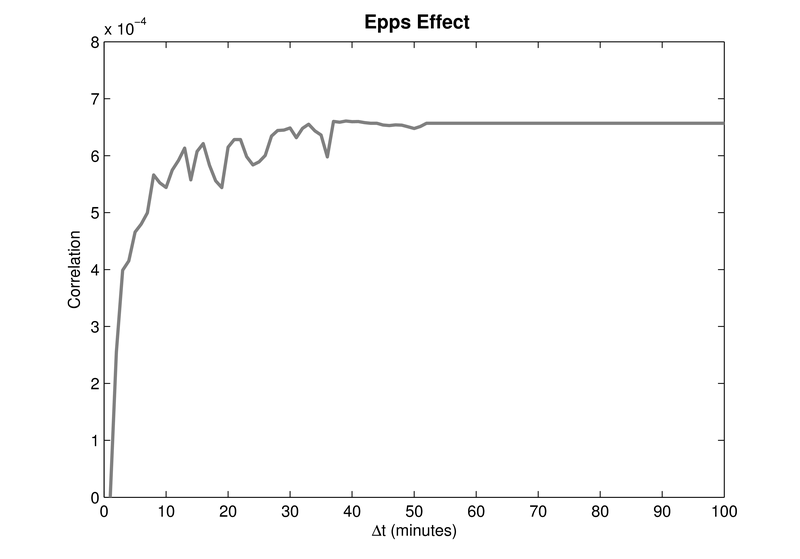

In [2]:
Image(filename='EppsEffect.png')

_Estimator for the correlation between Total and France Telecom on Euronext Paris on the period from 23/07/2012 to 27/07/2012 as a function of time discretization step._

The correlation estimator for high-frequency data is studied in many publications, for example Hayashi & Yoshida or Zhang.

### 4. Hayashi-Yoshida Estimator

Let $I^1_i=(T^1_i,T^1_{i+1}$, $i\geq1$, and $I^2_j=(T^2_j,T^2_{j+1}$, $j\geq1$.

The cumulative covariance estimator of Hayashi-Yoshida reads
$$U_n=\sum_{i,j}\Delta P^1(I^1_i)\Delta P^2(I^2_j)\mathbb{1}_{\{I^1_i\cap I^2_j\neq\emptyset\}}.$$

That is, the product of any pair of increments $\Delta P^1(I^1_i)$ and $\Delta P^2(I^2_j)$ will make a contribution to the summation only when the respective observation intervals $I^1_i$ and $I^2_i$ are overlapping.

This estimator does not need any selection of $\Delta$ and is convergent if the arrival times are independent from the price.

Then, they define two associated correlation estimators
- if $\sigma_1$ and $\sigma_2$ are known,
$$R^1_n=\frac1T\frac{\sum_{i,j}\Delta P^1(I^1_i)\Delta P^2(I^2_j)\mathbb{1}_{\{I^1_i\cap I^2_j\neq\emptyset\}}}{\sigma_1\sigma_2},$$
- if $\sigma_1$ and $\sigma_2$ are known/unknown,
$$R^2_n=\frac{\sum_{i,j}\Delta P^1(I^1_i)\Delta P^2(I^2_j)\mathbb{1}_{\{I^1_i\cap I^2_j\neq\emptyset\}}}{\sqrt{\sum_i\Delta P^1(I^1_i)^2}\sqrt{\sum_j\Delta P^2(I^2_j)^2}}.$$
Under the same conditions as for $U_n$, $R^1$ and $R^2$ are consistent for $\rho$ as $n\to\infty$.

**Remarque.** This estimator is nevertheless not robust to microstructure effects.

## III. Links between Market Indicators

You will use the market indicators computed last week for the study.

To do this, you can use linear regression or log-log linear regression.

You have to look at the links between the following indicators
- volume curve and number of trades ;
- turnover and number of trades ;
- best quotes quantities and volume ;
- spread and volatility.

## IV. Applications to the market data

### 1. Data import and cleaning (like in previous session)

### 2. Signature Plot

Plot $\hat{\sigma}(\Delta)$ with respect to $\Delta$ (in seconds or milliseconds).
In `resample` tou can use `ohlc`.
Don('t forget to remove the `NA` with the method `fillna('ffill')`

### 3. Volatility Garman-Klass

Compare for different $\Delta$ the volatility curves (as in TP2) for both estimators (classical and GK).

### 4. Epps effect

Plot $\hat{C}(\Delta)$ with respect to $\Delta$ (in seconds or milliseconds).

### 5. Hayashi-Yoshida estimator (compare to classical estimator)